In [ ]:
# LSTM과 GRU 셀
# 기본적으로 기본 순환층은 긴 시퀀스를 학습하기 어렵다. 반복될수록 그 전의 은닉 상태에 담긴 정보가 희석되기 때문이다.

# LSTM에는 순환되는 상태가 은닉 / 셀 상태 총 2개이다.
# 삭제 게이트, 입력 게이트, 출력 게이트로 구성되어 있다.


In [ ]:
from tensorflow.keras.datasets import imdb
from sklearn.model_selection import train_test_split
(train_input, train_target), (test_input, test_target) = imdb.load_data(num_words=500)
train_input, val_input, train_target, val_target = train_test_split(train_input, train_target, test_size=0.2, random_state=42)

# Padding 추가
from tensorflow.keras.preprocessing.sequence import pad_sequences
train_seq = pad_sequences(train_input, maxlen=100)
val_seq = pad_sequences(val_input, maxlen=100)

from tensorflow import keras
model = keras.Sequential()
model.add(keras.layers.Embedding(500,16,input_length=100))
model.add(keras.layers.LSTM(8))
model.add(keras.layers.Dense(1, activation='sigmoid'))

model.summary()

17473536/17464789 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 16)           8000      
                                                                 
 lstm (LSTM)                 (None, 8)                 800       
                                                                 
 dense (Dense)               (None, 1)                 9         
                                                                 
Total params: 8,809
Trainable params: 8,809
Non-trainable params: 0
_________________________________________________________________


In [ ]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model.compile(optimizer=rmsprop, loss='binary_crossentropy',metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-lstm-model.h5', save_best_only = True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model.fit(train_seq, train_target, epochs=100, batch_size=64, validation_data=(val_seq, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 15s 24ms/step - loss: 0.6928 - accuracy: 0.5196 - val_loss: 0.6923 - val_accuracy: 0.5558
Epoch 2/100
313/313 [==============================] - 7s 21ms/step - loss: 0.6912 - accuracy: 0.5911 - val_loss: 0.6904 - val_accuracy: 0.5932
Epoch 3/100
313/313 [==============================] - 6s 21ms/step - loss: 0.6877 - accuracy: 0.6259 - val_loss: 0.6856 - val_accuracy: 0.6198
Epoch 4/100
313/313 [==============================] - 7s 21ms/step - loss: 0.6791 - accuracy: 0.6480 - val_loss: 0.6726 - val_accuracy: 0.6582
Epoch 5/100
313/313 [==============================] - 7s 21ms/step - loss: 0.6495 - accuracy: 0.6840 - val_loss: 0.6152 - val_accuracy: 0.6870
Epoch 6/100
313/313 [==============================] - 7s 21ms/step - loss: 0.5773 - accuracy: 0.7299 - val_loss: 0.5657 - val_accuracy: 0.7346
Epoch 7/100
313/313 [==============================] - 7s 21ms/step - loss: 0.5451 - accuracy: 0.7501 - val_loss: 0.5389 - val_accuracy

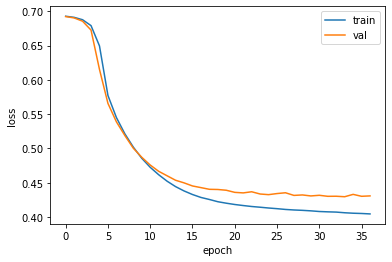

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [ ]:
# Dropout을 통해 개선하려한다.
# 다만 recurrent_dropout은 문제가 있어서 GPU를 사용할 수 없다.

model2 = keras.Sequential()
model2.add(keras.layers.Embedding(500,16, input_length=100))
model2.add(keras.layers.LSTM(8, dropout=0.3))
model2.add(keras.layers.Dense(1, activation="sigmoid"))

In [ ]:
# Dropout을 통해 개선한 버전이다.
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model2.compile(optimizer=rmsprop, loss='binary_crossentropy',metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-lstm-model.h5', save_best_only = True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model2.fit(train_seq, train_target, epochs=100, batch_size=64, validation_data=(val_seq, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

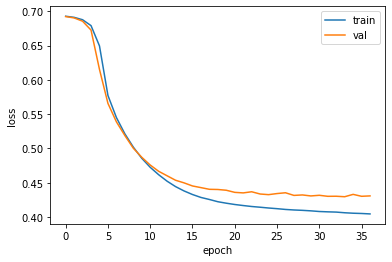

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [ ]:
# 순환층의 은닉 상태는 샘플의 마지막 타임스텝에 대한 은닉 상태만 다음 층으로 전달한다.
# 따라서 여러 층을 쌓을 때는 마지막 순환층에서만 마지막 타임스텝의 은닉 상태를 출력하도록 해야한다!

model3 = keras.Sequential()
model3.add(keras.layers.Embedding(500,16, input_length=100))
model3.add(keras.layers.LSTM(8, dropout=0.3, return_sequences=True))
model3.add(keras.layers.LSTM(8, dropout=0.3))
model3.add(keras.layers.Dense(1, activation="sigmoid"))
model3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 100, 16)           8000      
                                                                 
 lstm_4 (LSTM)               (None, 100, 8)            800       
                                                                 
 lstm_5 (LSTM)               (None, 8)                 544       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 9,353
Trainable params: 9,353
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# model3 훈련
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model2.compile(optimizer=rmsprop, loss='binary_crossentropy',metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-lstm-model.h5', save_best_only = True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model2.fit(train_seq, train_target, epochs=100, batch_size=64, validation_data=(val_seq, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 11s 24ms/step - loss: 2.9506 - accuracy: 0.0255 - val_loss: 2.4999 - val_accuracy: 0.0024
Epoch 2/100
313/313 [==============================] - 7s 21ms/step - loss: 2.2225 - accuracy: 0.0012 - val_loss: 2.0244 - val_accuracy: 0.0000e+00
Epoch 3/100
313/313 [==============================] - 6s 21ms/step - loss: 1.7989 - accuracy: 0.0000e+00 - val_loss: 1.6995 - val_accuracy: 0.0000e+00
Epoch 4/100
313/313 [==============================] - 6s 20ms/step - loss: 1.6001 - accuracy: 0.0000e+00 - val_loss: 1.5998 - val_accuracy: 0.0000e+00
Epoch 5/100
313/313 [==============================] - 6s 20ms/step - loss: 1.5620 - accuracy: 0.0049 - val_loss: 1.5886 - val_accuracy: 0.0098
Epoch 6/100
313/313 [==============================] - 6s 20ms/step - loss: 1.5554 - accuracy: 0.0808 - val_loss: 1.5841 - val_accuracy: 0.1346
Epoch 7/100
313/313 [==============================] - 6s 20ms/step - loss: 1.5500 - accuracy: 0.1893 - val_loss: 1

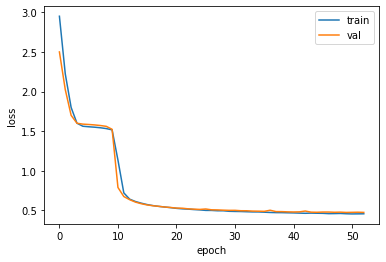

In [ ]:
# 보통 순환층을 쌓으면 성능이 높아진다.
# 이 예에서는 그리 큰 효과를 못 낸 편.

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

# GRU 신경망
* LSTM의 간소화 버전이라고 생각하면 된다.
* 그런데도 LSTM 못지않게 성능을 잘 낸다.

In [ ]:
model4 = keras.Sequential()
model4.add(keras.layers.Embedding(500,16,input_length=100))
model4.add(keras.layers.GRU(8)) # 이거만 다르다.
model4.add(keras.layers.Dense(1,activation='sigmoid'))
model4.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 100, 16)           8000      
                                                                 
 gru (GRU)                   (None, 8)                 624       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 8,633
Trainable params: 8,633
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# model4 - GRU 신경망 훈련
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model4.compile(optimizer=rmsprop, loss='binary_crossentropy',metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-gru-model.h5', save_best_only = True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model4.fit(train_seq, train_target, epochs=100, batch_size=64, validation_data=(val_seq, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 10s 25ms/step - loss: 0.6920 - accuracy: 0.5304 - val_loss: 0.6912 - val_accuracy: 0.5314
Epoch 2/100
313/313 [==============================] - 7s 23ms/step - loss: 0.6895 - accuracy: 0.5680 - val_loss: 0.6885 - val_accuracy: 0.5656
Epoch 3/100
313/313 [==============================] - 7s 22ms/step - loss: 0.6859 - accuracy: 0.5868 - val_loss: 0.6846 - val_accuracy: 0.5840
Epoch 4/100
313/313 [==============================] - 7s 21ms/step - loss: 0.6807 - accuracy: 0.6023 - val_loss: 0.6790 - val_accuracy: 0.5956
Epoch 5/100
313/313 [==============================] - 6s 21ms/step - loss: 0.6729 - accuracy: 0.6169 - val_loss: 0.6706 - val_accuracy: 0.6094
Epoch 6/100
313/313 [==============================] - 7s 23ms/step - loss: 0.6616 - accuracy: 0.6319 - val_loss: 0.6582 - val_accuracy: 0.6224
Epoch 7/100
313/313 [==============================] - 8s 27ms/step - loss: 0.6447 - accuracy: 0.6488 - val_loss: 0.6391 - val_accuracy

In [ ]:
# LSTM과 거의 비슷한 성능을 낸다.

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [ ]:
# 2rnn이 어딨는지 몰라서 시도는 못해봤는데
# 어쨌든 이런 식으로 평가 하면 된다.
test_seq = pad_sequences(test_input, maxlen=100)
rnn_model = keras.models.load_model('best-2rnn-model.h5')
rnn_model.evaluate(test_seq, test_target)

# 책 끝 !!!